                        Filename  Width  Height    Age  Gender  Valence  \
0         h616x5yhky60how3nt.jpg  317.0   380.0  Adult  Female      3.4   
1         h616x5yhky60how3nt.jpg  317.0   380.0  Adult    Male      4.0   
2  COCO_val2014_000000020459.jpg  640.0   458.0  Adult    Male      4.4   
3  COCO_val2014_000000033835.jpg  640.0   480.0  Adult    Male      6.2   
4         arhnymaeequumexga8.jpg  267.0   400.0  Adult    Male      4.8   

   Arousal  Dominance  Peace  Affection  ...  Fear  Pain  Suffering  X_min  \
0      6.0        5.8    0.0        0.0  ...   0.0   0.0        0.0  146.0   
1      5.0        4.4    0.0        0.0  ...   1.0   0.0        0.0   37.0   
2      8.4        5.0    0.0        0.0  ...   0.0   0.0        0.0  109.0   
3      4.2        7.4    0.0        1.0  ...   0.0   0.0        0.0  404.0   
4      6.0        6.2    1.0        0.0  ...   0.0   0.0        0.0    2.0   

   Y_min  X_max  Y_max           Arr_name           Crop_name  Face_Visibility  

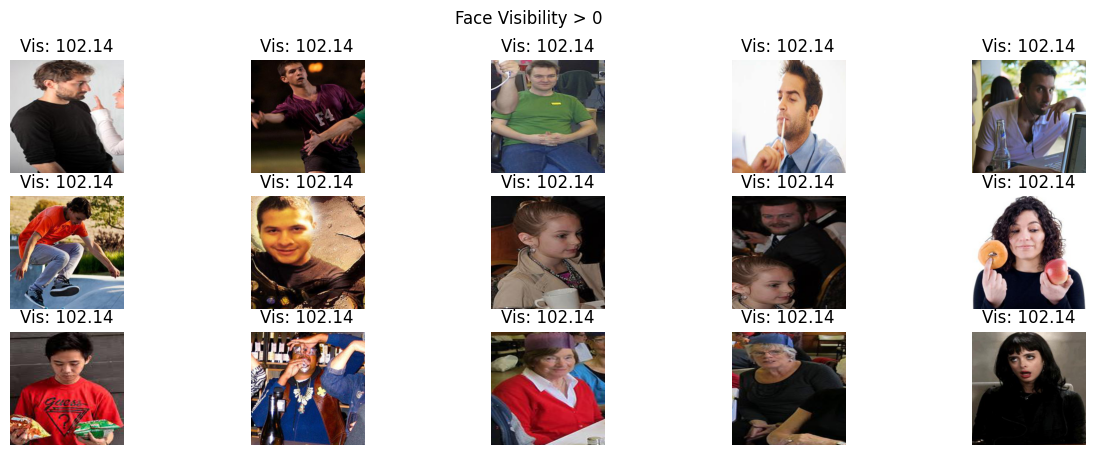

crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_0.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_6.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_7.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_8.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_9.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_10.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_12.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_13.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_14.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/crop_arr_val_15.npy
crop_path:  /Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs/cr

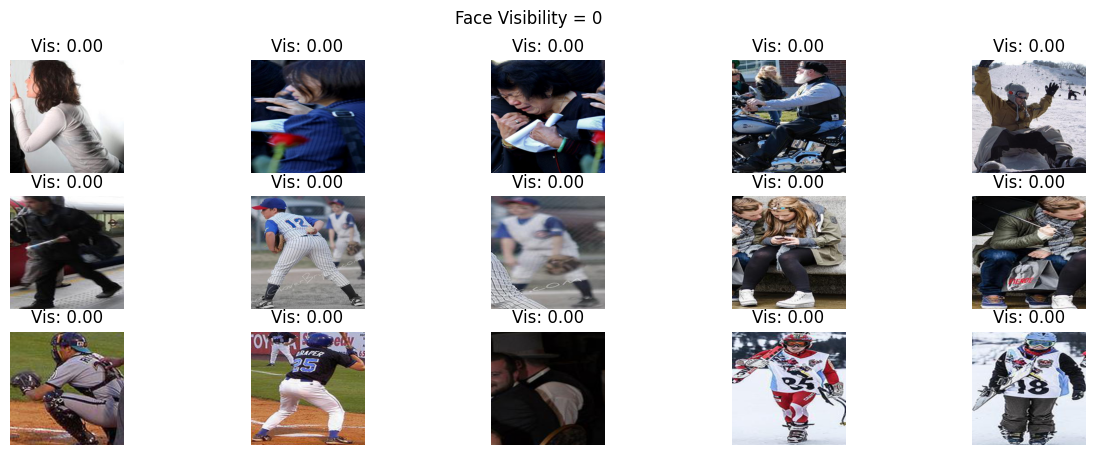

Number of visible samples with Happiness > 0: 693 / 958


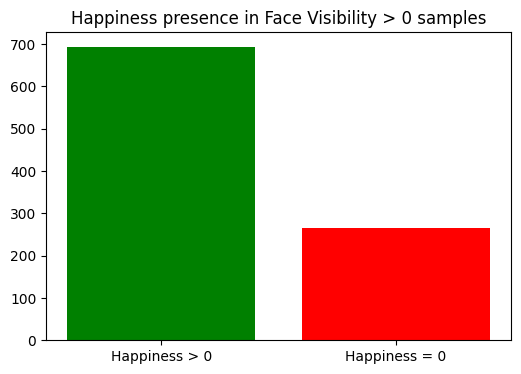

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Load your CSV data file (update path as needed)
csv_path = "/Users/sillahbabar/Desktop/oulu/emonet_github/emotic-dataset/preprocessing/normalized_dataset.csv"
base_path_images = "/Users/sillahbabar/Desktop/oulu/emotic/archive_emot/img_arrs"
df = pd.read_csv(csv_path)

# Check data info
print(df.head())

# Filter samples with Face_Visibility > 0 and = 0
df_visible = df[df['Face_Visibility'] > 0].reset_index(drop=True)
df_invisible = df[df['Face_Visibility'] == 0].reset_index(drop=True)

print(f"Visible samples: {len(df_visible)}")
print(f"Invisible samples: {len(df_invisible)}")

# Function to plot face crops from .npy files
def plot_face_crops(df_subset, title, n=15):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        crop_path = df_subset.loc[i, 'Crop_name']  # e.g. 'crop_arr_train_0.npy'
        crop_path = os.path.join(base_path_images, crop_path)
        print("crop_path: ", crop_path)
        crop = np.load(crop_path)  # load numpy array crop image
        
        plt.subplot(3, 5, i + 1)
        plt.imshow(crop)
        plt.title(f"Vis: {df_subset.loc[i, 'Face_Visibility']:.2f}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot 15 face images with visibility > 0
plot_face_crops(df_visible, "Face Visibility > 0", n=15)

# Plot 15 face images with visibility = 0
plot_face_crops(df_invisible, "Face Visibility = 0", n=15)

# Now, count how many samples have a specific emotion in the visible dataset
# For example: Happiness > 0
emotion = 'Happiness'
happy_count = (df_visible[emotion] > 0).sum()
total_visible = len(df_visible)

print(f"Number of visible samples with {emotion} > 0: {happy_count} / {total_visible}")

# Optionally, bar plot of Happiness presence in visible dataset
plt.figure(figsize=(6,4))
plt.bar(['Happiness > 0', 'Happiness = 0'], [happy_count, total_visible - happy_count], color=['green','red'])
plt.title(f"Happiness presence in Face Visibility > 0 samples")
plt.show()


In [ ]:
import pandas as pd

# Path to your CSV
csv_path = "/Users/sillahbabar/Desktop/oulu/emotic/archive_emot/annots_arrs/normalized_dataset.csv"
output_csv = "balanced_data.csv"

# Load the dataset
df = pd.read_csv(csv_path)



# Emotion columns — same as in your header
emotion_cols = [
    'Peace', 'Affection', 'Esteem', 'Anticipation', 'Engagement',
    'Confidence', 'Happiness', 'Pleasure', 'Excitement', 'Surprise',
    'Sympathy', 'Doubt/Confusion', 'Disconnection', 'Fatigue',
    'Embarrassment', 'Yearning', 'Disapproval', 'Aversion',
    'Annoyance', 'Anger', 'Sensitivity', 'Sadness', 'Disquietment',
    'Fear', 'Pain', 'Suffering'
]

# Count number of labels per sample
df['Num_Labels'] = df[emotion_cols].sum(axis=1)
# Count total number of positive samples per emotion label
label_counts = df[emotion_cols].sum().sort_values(ascending=False)

print("\n📈 Emotion Label Counts:")
print(label_counts)

# Print basic stats
print("\n📊 Label count statistics:")
print(df_visible['Num_Labels'].describe())
print("\n🔢 Samples with >1 label:", (df_visible['Num_Labels'] > 1).sum())

# Optional: save to CSV
# df_visible.to_csv(output_csv, index=False)


In [16]:
import pandas as pd

import numpy as np
# Load the CSV
csv_path = "/Users/sillahbabar/Desktop/oulu/emonet_github/emotic-dataset/preprocessing/normalized_dataset.csv"  # Update with your path


output_csv = "balanced_data.csv"

# Load
df = pd.read_csv(csv_path)

# Filter visible faces
df_visible = df[df['Face_Visibility'] > 0].reset_index(drop=True)
print("Visible count:", len(df_visible))

# Emotion columns
emotion_cols = [
    'Peace', 'Affection', 'Esteem', 'Anticipation', 'Engagement',
    'Confidence', 'Happiness', 'Pleasure', 'Excitement', 'Surprise',
    'Sympathy', 'Doubt/Confusion', 'Disconnection', 'Fatigue',
    'Embarrassment', 'Yearning', 'Disapproval', 'Aversion',
    'Annoyance', 'Anger', 'Sensitivity', 'Sadness', 'Disquietment',
    'Fear', 'Pain', 'Suffering'
]

# Before undersampling
counts_before = df_visible[emotion_cols].sum()
print("Before undersampling:\n", counts_before)

# Choose a target max size for each class
max_samples_per_class = 500  # for example, reduce large classes to 500

balanced_list = []

# For each emotion, pick samples
for emo in emotion_cols:
    subset = df_visible[df_visible[emo] == 1]
    n = len(subset)
    if n > max_samples_per_class:
        # undersample
        subset = subset.sample(n=max_samples_per_class, random_state=42)
    # else keep all
    balanced_list.append(subset)

# Concatenate
df_balanced = pd.concat(balanced_list, ignore_index=True)

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check counts after undersampling
counts_after = df_balanced[emotion_cols].sum()
print("After undersampling:\n", counts_after)

# Verify each sample has exactly one emotion
df_balanced['emotion_sum'] = df_balanced[emotion_cols].sum(axis=1)
n_bad = (df_balanced['emotion_sum'] != 1).sum()
print("Samples not having exactly one emotion = 1:", n_bad)

# If everything is OK, drop the helper column and save
df_balanced = df_balanced.drop(columns=['emotion_sum'])
df_balanced.to_csv(output_csv, index=False)
print("Balanced dataset saved to:", output_csv)



Visible count: 958
Before undersampling:
 Peace              236.0
Affection          271.0
Esteem             200.0
Anticipation       790.0
Engagement         850.0
Confidence         483.0
Happiness          693.0
Pleasure           392.0
Excitement         582.0
Surprise           119.0
Sympathy           325.0
Doubt/Confusion    105.0
Disconnection      232.0
Fatigue             70.0
Embarrassment       42.0
Yearning           110.0
Disapproval        107.0
Aversion            87.0
Annoyance          125.0
Anger               42.0
Sensitivity         56.0
Sadness             76.0
Disquietment       136.0
Fear                47.0
Pain                64.0
Suffering           63.0
dtype: float64
After undersampling:
 Peace              1479.0
Affection          1674.0
Esteem             1216.0
Anticipation       4388.0
Engagement         4699.0
Confidence         2664.0
Happiness          3867.0
Pleasure           2351.0
Excitement         3265.0
Surprise            776.0
Sympathy   

In [21]:
import numpy as np
import pandas as pd
from pathlib import Path

csv_path = "/Users/sillahbabar/Desktop/oulu/emotic/archive_emot/annots_arrs/annot_arrs_val_with_visibility.csv"  # Update with your path
df = pd.read_csv(csv_path)

df_visible = df[df['Face_Visibility'] > 0].reset_index(drop=True)
def scale_to_neg1_pos1(x, old_min, old_max):
    return ( (x - old_min) / (old_max - old_min) ) * 2 - 1

# Suppose your valence in df, original range 1 to 10
old_min = 1.0
old_max = 10.0

df_visible['Valence_norm'] = scale_to_neg1_pos1(df_visible['Valence'], old_min, old_max)
df_visible['Arousal_norm'] = scale_to_neg1_pos1(df_visible['Arousal'], old_min, old_max)
df_visible.to_csv("normalized_dataset_val.csv")


In [6]:
import pandas as pd

emotion_cols = [
    'Peace', 'Affection', 'Esteem', 'Anticipation', 'Engagement',
    'Confidence', 'Happiness', 'Pleasure', 'Excitement', 'Surprise',
    'Sympathy', 'Doubt/Confusion', 'Disconnection', 'Fatigue',
    'Embarrassment', 'Yearning', 'Disapproval', 'Aversion',
    'Annoyance', 'Anger', 'Sensitivity', 'Sadness', 'Disquietment',
    'Fear', 'Pain', 'Suffering'
]

# Load the dataset
df = pd.read_csv("/Users/sillahbabar/Desktop/desk/oulu/emotic/archive_emot/annots_arrs/normalized_balanced_limited.csv")

# Function to keep only the dominant emotion
def keep_dominant_emotion(row):
    # Get index(es) of max emotion(s)
    max_val = row[emotion_cols].max()
    max_emotions = row[emotion_cols] == max_val

    # Create a new row where only one emotion (the first max) is kept
    new_row = row.copy()
    new_row[emotion_cols] = 0
    first_max_col = max_emotions[max_emotions].index[0]  # pick the first one
    new_row[first_max_col] = 1
    return new_row

# Apply function to all rows
df_dominant = df.apply(keep_dominant_emotion, axis=1)

# Save the cleaned dataset
df_dominant.to_csv("/Users/sillahbabar/Desktop/desk/oulu/emotic/archive_emot/annots_arrs/normalized_balanced_limited_dominant_emotion.csv", index=False)

print("✅ Cleaned dataset saved with only one dominant emotion per sample.")


✅ Cleaned dataset saved with only one dominant emotion per sample.
